***Project: Predicting House Prices***

Step 1: Set Up Google Colab

Open Google Colab: Google Colab

Create a new notebook.

Step 2: Import Libraries

First, we'll need to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

***Step 3: Load the Dataset***

We'll use the "House Prices" dataset from Kaggle. For simplicity, we will load it directly from a URL.

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


***Step 4: Exploratory Data Analysis (EDA)***

Let's perform some basic exploratory data analysis to understand the dataset.

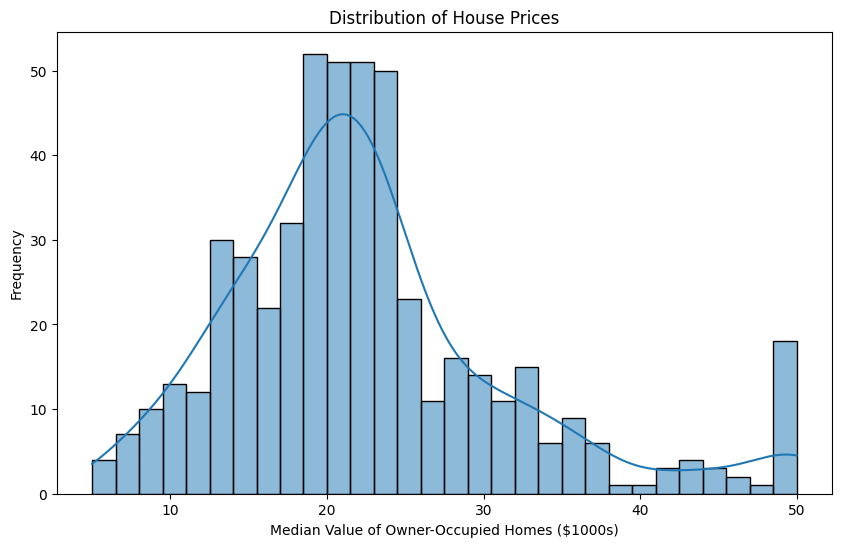

In [3]:
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

# Visualise the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['medv'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.ylabel('Frequency')
plt.show()

***Step 5: Feature Selection and Preprocessing***

Select the features and prepare the data for modeling.

In [4]:
# Define features and target variable
X = data.drop('medv', axis=1)
y = data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')

Training set: (404, 13), (404,)
Testing set: (102, 13), (102,)


***Step 6: Train a Simple Linear Regression Model***

Train a linear regression model to predict house prices.

In [5]:
# Initialise and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

***Step 7: Evaluate the Model***

Evaluate the performance of the model using mean squared error and R-squared.

In [6]:
# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 24.29
R-squared: 0.67


***Step 8: Visualise the Results***

Visualise the actual vs. predicted house prices.

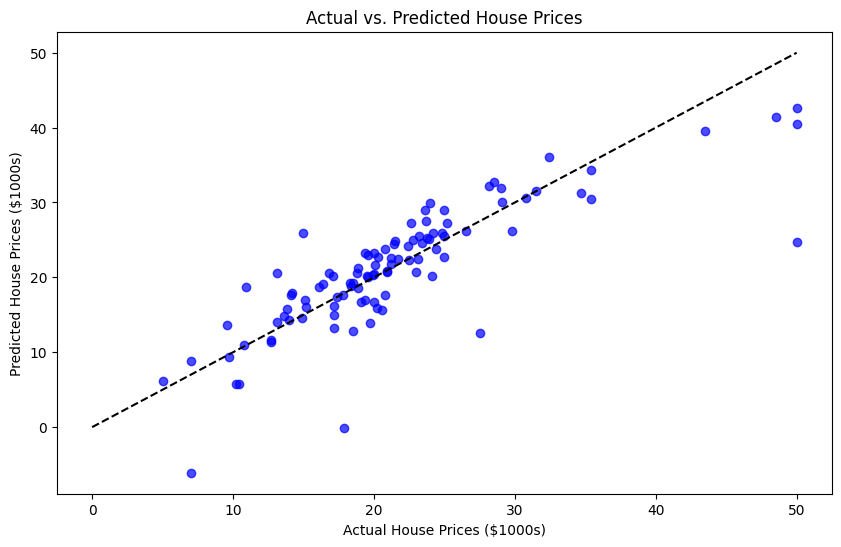

In [7]:
# Plot actual vs. predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual House Prices ($1000s)')
plt.ylabel('Predicted House Prices ($1000s)')
plt.title('Actual vs. Predicted House Prices')
plt.show()